In [7]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

tickers = [ 'ZOMATO.NS', 'GOLDBEES.NS','NTPC.NS',]

data = yf.download(tickers, start=start_date, end=end_date, progress=False)



In [8]:
#Preprocess Dataset

def clean_yf(data):
    data.columns = data.columns = [f'{ticker}_{attribute}' for attribute, ticker in data.columns]
    data = data.reset_index()
    data_melted = data.melt(id_vars=['Date'], var_name='Ticker_Attribute', value_name='Value')
    data_melted[['Ticker', 'Attribute']] = data_melted['Ticker_Attribute'].str.split('_', expand=True)
    data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='Value', aggfunc='first')
    stock_data = data_pivoted.reset_index()
    return stock_data




In [9]:
stock_data = clean_yf(data)

In [10]:
stock_data.head()

Attribute,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-10-09 00:00:00+00:00,GOLDBEES.NS,48.880001,48.880001,49.939999,48.630001,49.849998,18450424.0
1,2023-10-09 00:00:00+00:00,NTPC.NS,228.404648,234.699997,236.300003,230.500000,233.850006,10659145.0
2,2023-10-09 00:00:00+00:00,ZOMATO.NS,103.900002,103.900002,105.250000,101.000000,103.800003,53811658.0
3,2023-10-10 00:00:00+00:00,GOLDBEES.NS,48.930000,48.930000,49.290001,48.860001,49.290001,6469486.0
4,2023-10-10 00:00:00+00:00,NTPC.NS,229.572464,235.899994,236.850006,233.750000,234.899994,11665907.0


In [11]:
pivot = stock_data.pivot_table(index='Date',columns='Ticker',values='Adj Close') #pivot dataset for visualiation
pivot.head()

Ticker,GOLDBEES.NS,NTPC.NS,ZOMATO.NS
Date,,,
2023-10-09 00:00:00+00:00,48.880001,228.404648,103.900002
2023-10-10 00:00:00+00:00,48.930000,229.572464,106.050003
2023-10-11 00:00:00+00:00,49.169998,232.297348,109.000000
2023-10-12 00:00:00+00:00,49.389999,235.119583,109.849998
2023-10-13 00:00:00+00:00,49.490002,235.557510,111.000000


In [12]:
norm = pivot.copy()
normalised_data = norm.div(norm.iloc[0]).mul(100)

In [13]:
normalised_data=normalised_data.reset_index()
normalised_data['Date'] = pd.to_datetime(normalised_data['Date'])
normalised_data.set_index('Date',inplace=True)



In [14]:
normalised_data.head()

Ticker,GOLDBEES.NS,NTPC.NS,ZOMATO.NS
Date,,,
2023-10-09 00:00:00+00:00,100.000000,100.000000,100.000000
2023-10-10 00:00:00+00:00,100.102290,100.511293,102.069299
2023-10-11 00:00:00+00:00,100.593284,101.704300,104.908564
2023-10-12 00:00:00+00:00,101.043368,102.939929,105.726657
2023-10-13 00:00:00+00:00,101.247955,103.131662,106.833492


In [15]:
rolling = normalised_data.rolling(window=10).mean()

<Axes: xlabel='Date'>

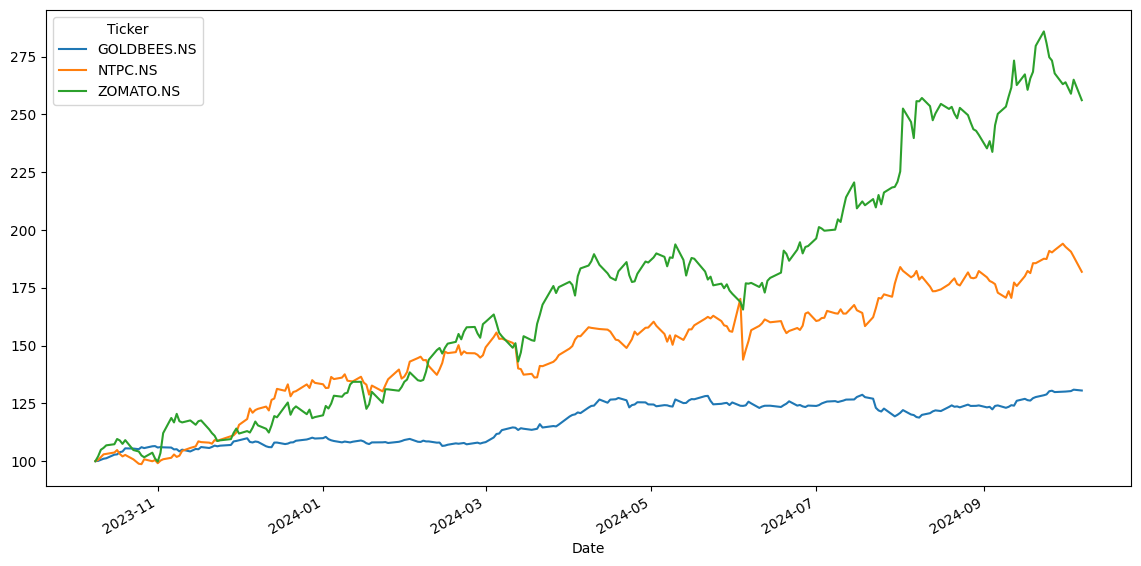

In [16]:
normalised_data.plot(kind='line',figsize=(14,7))

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
normalised_data.columns

Index(['GOLDBEES.NS', 'NTPC.NS', 'ZOMATO.NS'], dtype='object', name='Ticker')

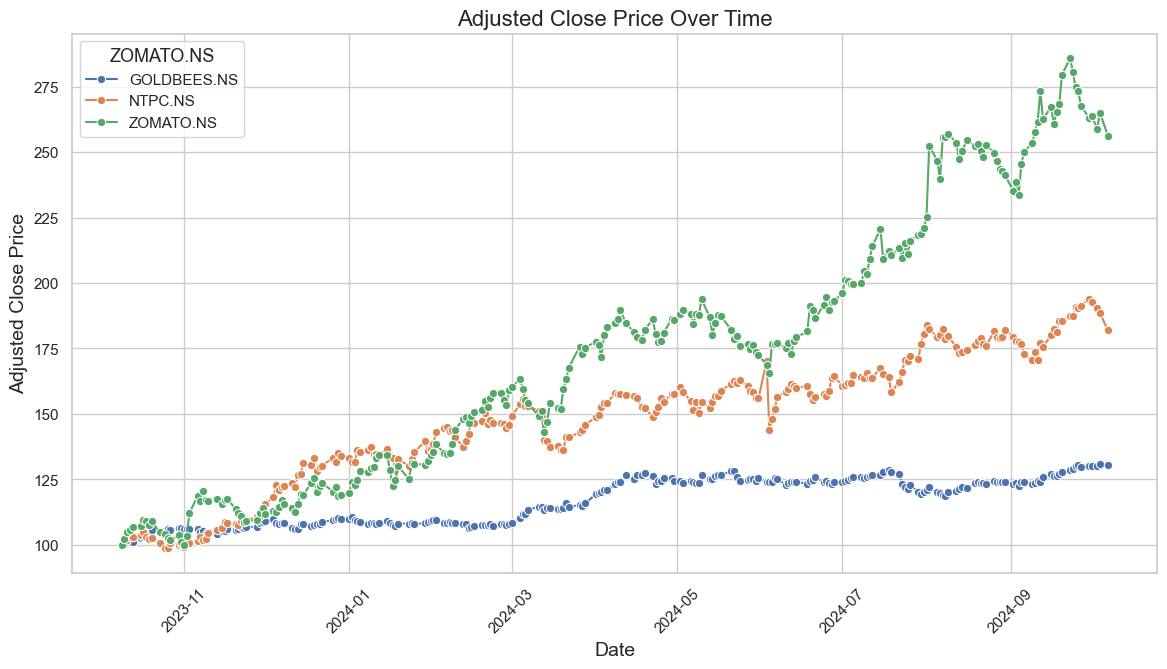

In [19]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index("Date",inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')
for column in normalised_data.columns:
    sns.lineplot(data=normalised_data, x='Date', y=normalised_data[column],label=column, marker='o')

    plt.title('Adjusted Close Price Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Adjusted Close Price', fontsize=14)
    plt.legend(title=column, title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

In [20]:
st1=stock_data.copy()
st1.set_index('Date',inplace=True)

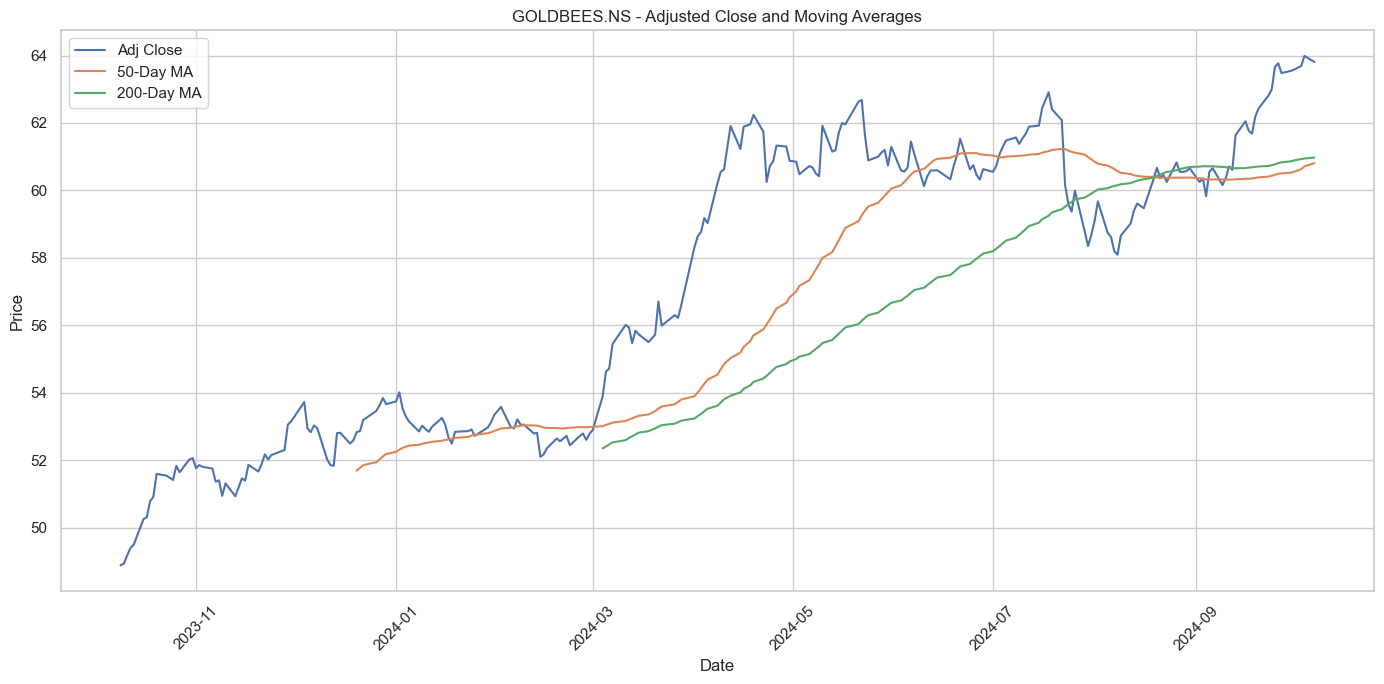

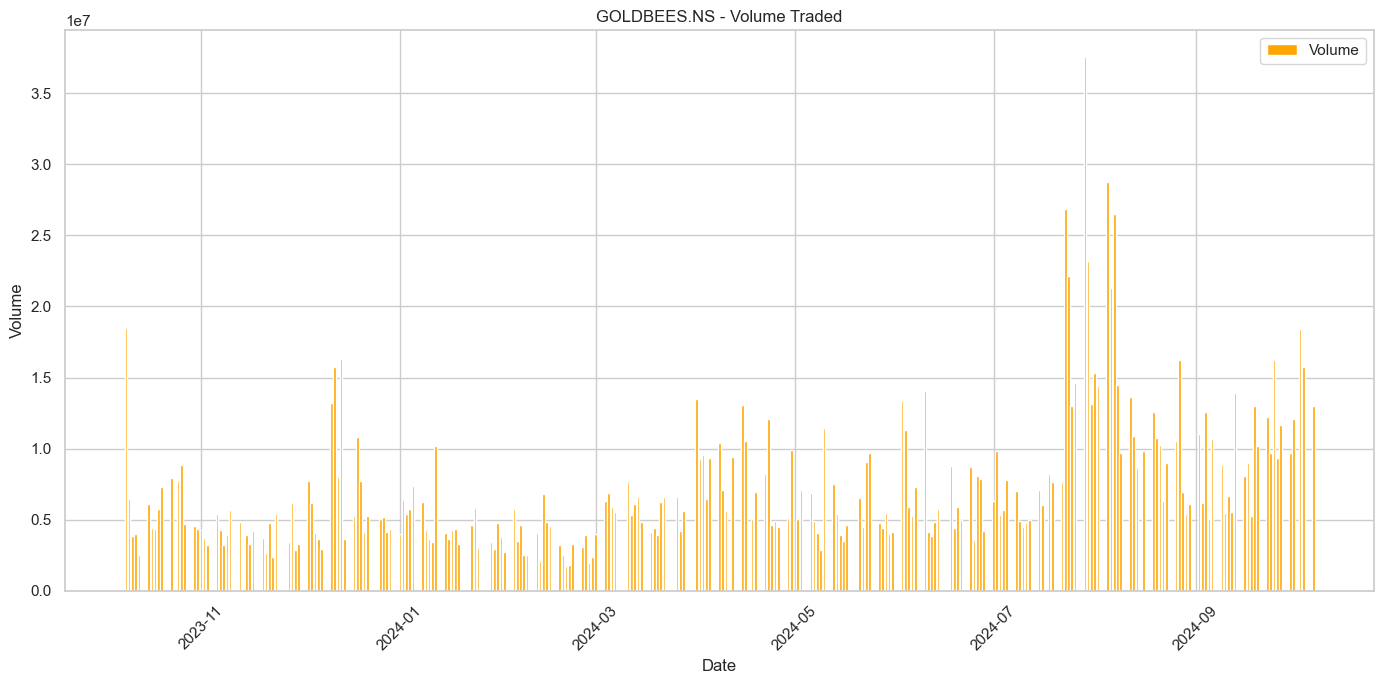

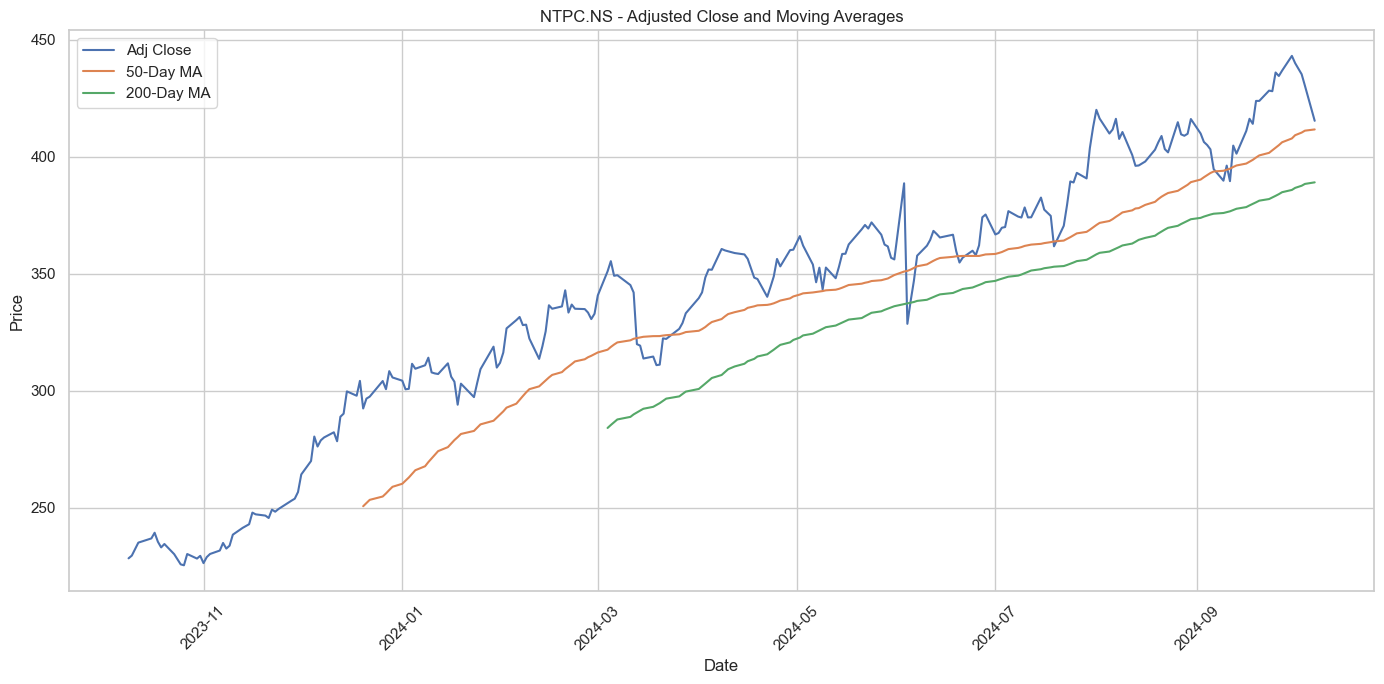

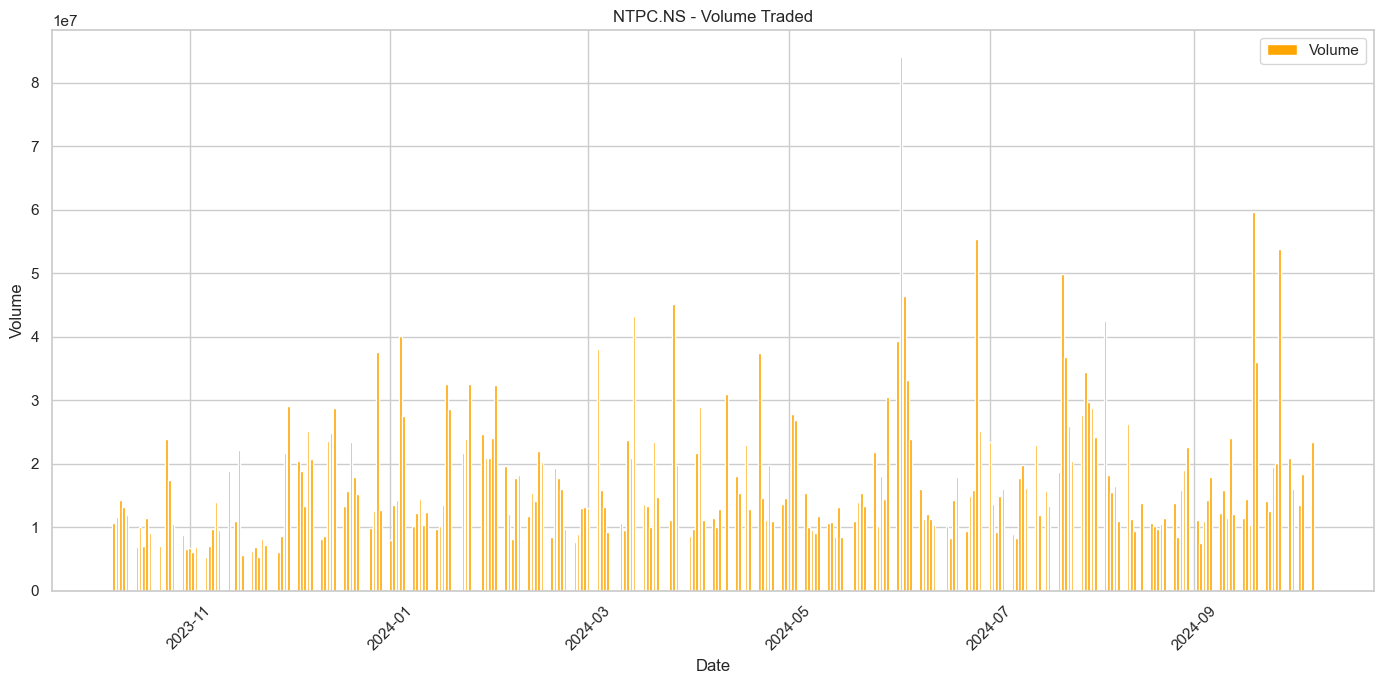

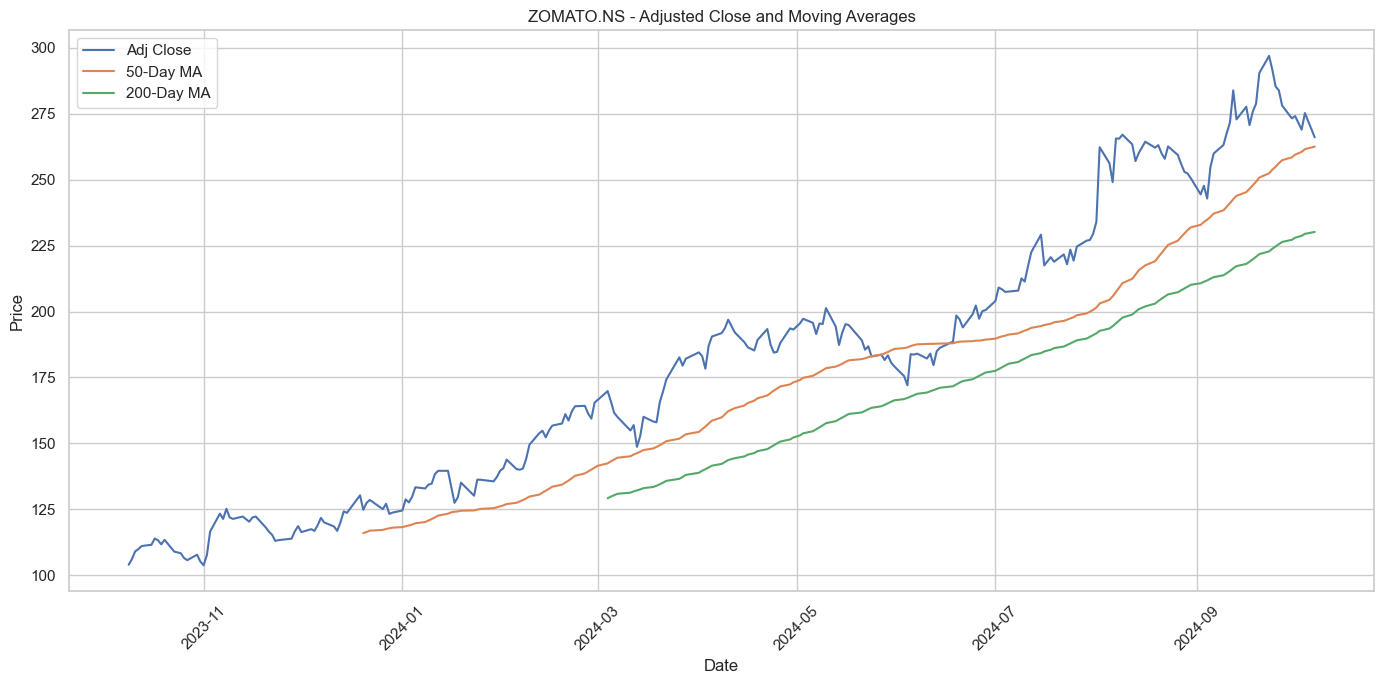

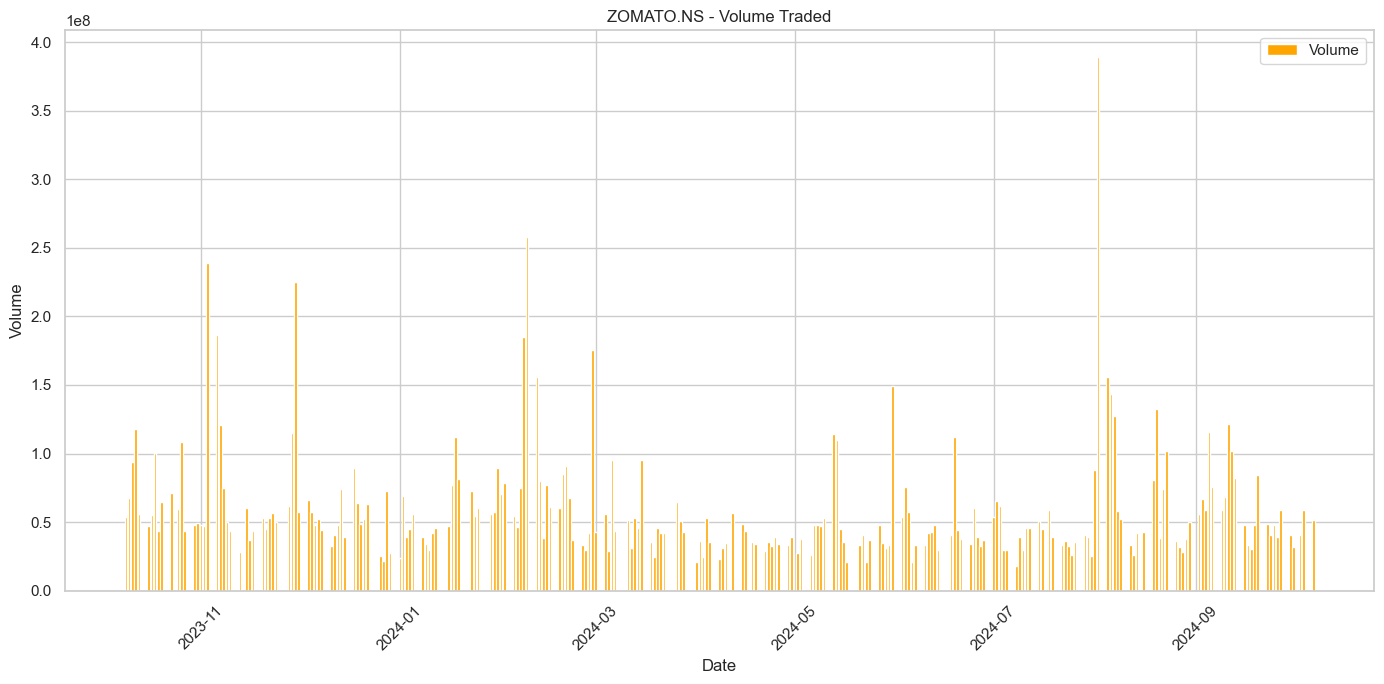

In [21]:
short_window = 50
long_window = 100


unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = st1[st1['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

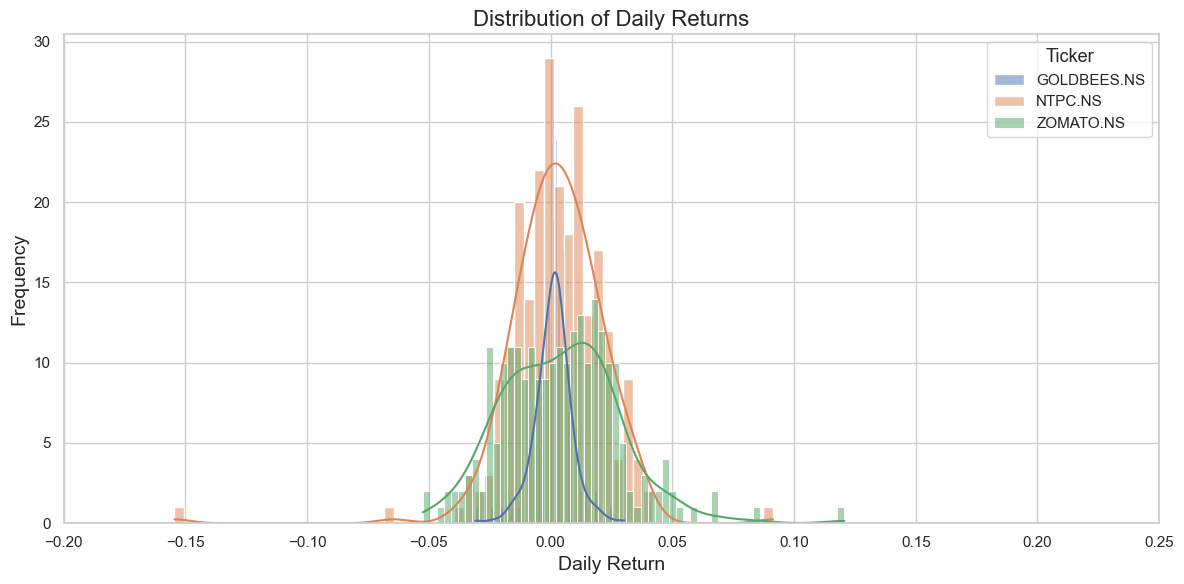

In [22]:
stock_data['daily return'] = stock_data.groupby('Ticker')["Adj Close"].pct_change()
st1['daily return'] = st1.groupby('Ticker')["Adj Close"].pct_change()
plt.figure(figsize=(12,6))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker']==ticker]
    sns.histplot(ticker_data['daily return'].dropna(),bins=60, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(-0.2, 0.25) 
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
st1['daily return'] = st1.groupby('Ticker')["Adj Close"].pct_change()

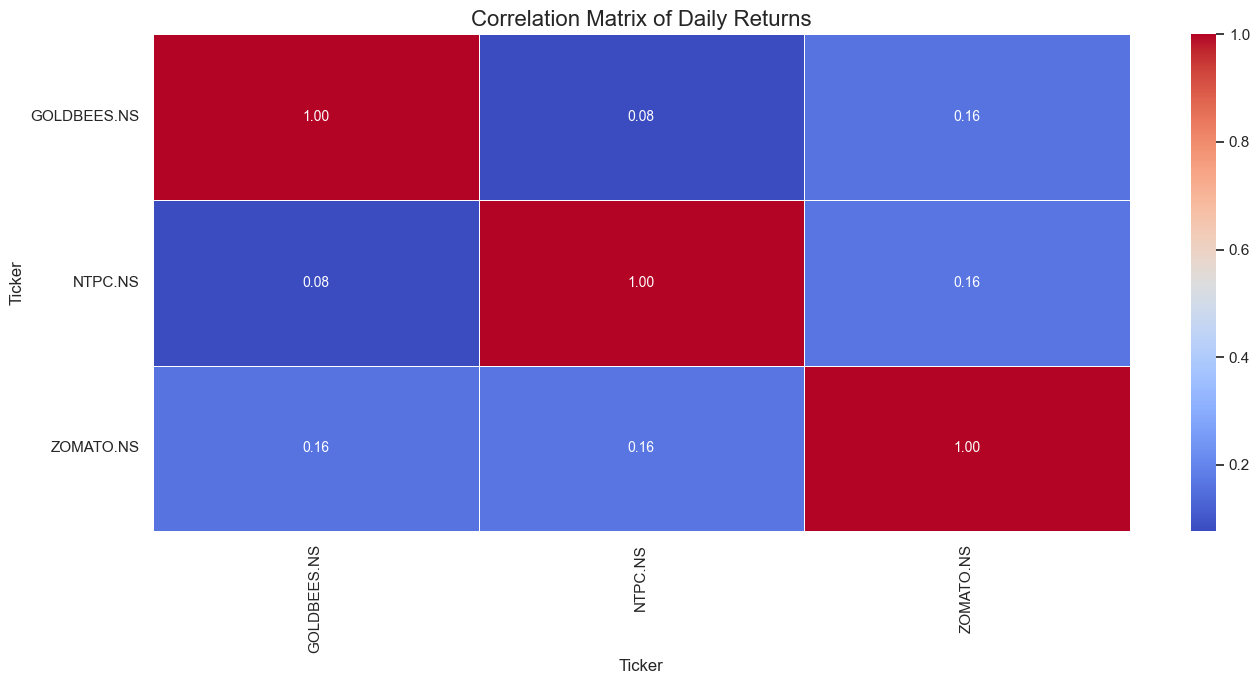

In [24]:
daily_ret = st1.pivot_table(index="Date",columns="Ticker",values="daily return")
cor_mat = daily_ret.corr()
plt.figure(figsize=(14,7))

sns.set(style='whitegrid')
sns.heatmap(cor_mat,annot=True,cmap="coolwarm",linewidths=0.5,fmt = '.2f',  annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [25]:
import numpy as np

In [26]:
stocks = {}
for ticker in tickers:
    stock = yf.Ticker(ticker=ticker)
    if 'beta' in stock.info:
        stocks[ticker] = stock.info['beta']
    else:
         stocks[ticker] = None


In [27]:
stocks['GOLDBEES.NS'] = 0.96

In [28]:

volatility = daily_ret.std() * np.sqrt(252) #Annualize Volatility


In [29]:
risk_free_rate = 0.0683

nifty = yf.Ticker("^NSEI")
nifty_hist = nifty.history(period="10y")
nifty_hist['Daily Return'] = nifty_hist['Close'].pct_change()

# Calculate the expected market return
expected_market_return = np.mean(nifty_hist['Daily Return']) * 252  # Annualized return
print(f"Expected Market Return: {expected_market_return * 100:.2f}%")

# Calculate expected return for each stock
expected_returns = {}
for ticker in tickers:
    beta_value = stocks[ticker]  # Use beta value from the dictionary
    expected_return = (risk_free_rate + beta_value * (expected_market_return - risk_free_rate)) 
    expected_returns[ticker] = expected_return

Expected Market Return: 13.30%


In [30]:
stock_stats = pd.DataFrame({
    "Expected Returns": expected_returns,
    "Volatility": volatility
})

stock_stats.head()

,Expected Returns,Volatility
GOLDBEES.NS,0.130398,0.122470
NTPC.NS,0.096762,0.317806
ZOMATO.NS,0.087835,0.382877


In [31]:
expected_returns = np.array(stock_stats['Expected Returns'])
expected_returns = expected_returns.astype(float)

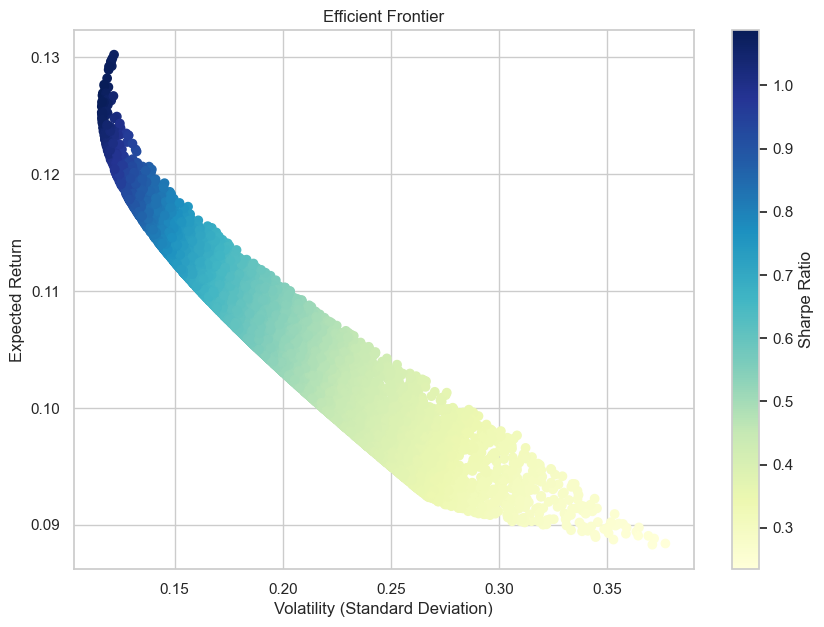

In [32]:
def portfolio_performance(weights,returns,cov_matrix):
    portfolio_return = np.dot(weights,returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix,weights)))
    return portfolio_return, portfolio_volatility

num_portfolios = 10000

results = np.zeros((3,num_portfolios))
cov_matrix = daily_ret.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()



In [33]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.12765950883698568, 0.11740206173947983, 1.0873702467020345)

In [34]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights*100
})

portfolio_weights_df

,Ticker,Weight
0,GOLDBEES.NS,41.819655
1,NTPC.NS,12.148853
2,ZOMATO.NS,46.031492
